In [92]:
%load_ext autoreload
%autoreload
from tracking import visualise_tracks, track,consolidate_indices, iou_track
from utils import verify_ID_uniqueness, visualise_image, visualise_masks
from make_gaussians import add_centroids,make_gaussian_masks, visualise_gaussians
from make_dataset import make_dataset
from resize_data import resize_data, scale_data
from discard import score_and_pos_discard, class_and_size_discard
import h5py
import os
ROOT_DIR = os.path.abspath("../")
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
# Path to the processed and raw folders in the data
PROCESSED_PATH = os.path.join(ROOT_DIR, "../data/processed/")
RAW_PATH = os.path.join(ROOT_DIR, "../data/raw/")

name = "30SLight1_Test2"


data_file = os.path.join(PROCESSED_PATH, "{}/{}.hdf5".format(name,name))
class_filtered_file = os.path.join(PROCESSED_PATH, "{}/{}_cls_filtered.hdf5".format(name,name))

tracked_file = os.path.join(PROCESSED_PATH, "{}/{}_tracked.hdf5".format(name,name))
tracked_file_c = os.path.join(PROCESSED_PATH, "{}/{}_tracked_c.hdf5".format(name,name))
resized_file = os.path.join(PROCESSED_PATH, "{}/{}_resized.hdf5".format(name,name))
dataset_file = os.path.join(PROCESSED_PATH, "{}/{}_dataset.hdf5".format(name,name))
target_folder = os.path.join(PROCESSED_PATH, "{}/mask_images/".format(name))
target_folder_consolidated = os.path.join(PROCESSED_PATH, "{}/tracked_images_consolidated/".format(name))
target_folder_gauss = os.path.join(PROCESSED_PATH, "{}/tracked_images_gauss/".format(name))

In [103]:
class_and_size_discard(data_file,tracked_file, small_threshold=20)

In [12]:
score_discard(class_filtered_file,tracked_file,[('person', 0.995)])

In [105]:
track(tracked_file)

In [106]:
track(tracked_file, reverse=True)

In [107]:
consolidate_indices(tracked_file)

In [108]:
resize_data(tracked_file, resized_file,256,314)

In [109]:
make_gaussian_masks(resized_file,verbose=0)

In [110]:
visualise_gaussians(resized_file,target_folder_gauss,captions = True)


*** No instances to display *** 



In [111]:
visualise_tracks(resized_file, target_folder_consolidated , id_idx = 0)


*** No instances to display *** 



In [112]:
make_dataset(resized_file, dataset_file)

In [141]:
f = h5py.File(dataset_file, "r")

In [142]:
len(list(f.keys()))

230

In [143]:
list(f['datapoint0'].keys())

['delta_masks',
 'future_mask',
 'gaussian_mask',
 'images',
 'mask_id',
 'masks',
 'origin_frame']

In [144]:
f['datapoint0']['delta_masks'].shape

(182, 314, 3)

In [145]:
f['datapoint0']['future_mask'].shape

(182, 314)

In [146]:
f['datapoint0']['gaussian_mask'].shape

(182, 314)

In [147]:
f['datapoint0']['images'].shape

(182, 314, 3, 3)

In [148]:
f['datapoint0']['mask_id'].value

array([ 1.], dtype=float32)

In [149]:
f['datapoint0']['origin_frame'].shape

(1,)

In [150]:
f['datapoint0']['masks'].shape

(182, 314, 3)

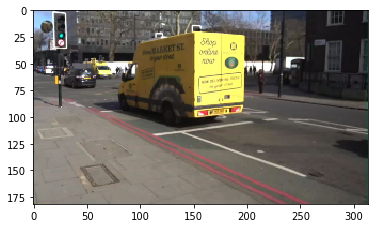

In [151]:
visualise_image(f['datapoint0']['images'].value[:,:,:,0])

In [152]:
f.close()

In [52]:
f2 = h5py.File(data_file, "r")

In [53]:
f2['frame1']['image'].shape

(540, 960, 3)

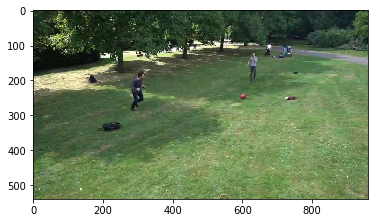

In [54]:
visualise_image(f2['frame1']['image'].value, save_path = os.path.join(PROCESSED_PATH, "{}/{}tets.jpg".format(name,name)) )

In [55]:
f2['frame1']['rois'].value

array([[174, 279, 286, 327],
       [121, 613, 206, 646],
       [186, 161, 210, 188],
       [239, 596, 254, 610],
       [ 96, 667, 132, 685],
       [ 79, 546,  94, 573],
       [244, 721, 259, 756],
       [ 89, 387, 119, 399],
       [318, 198, 345, 255]], dtype=int32)

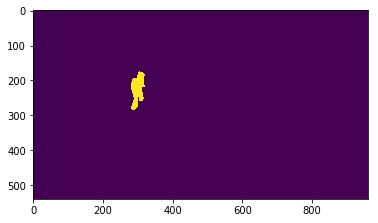

In [58]:
visualise_image(f2['frame1']['masks'].value[:,:,0])

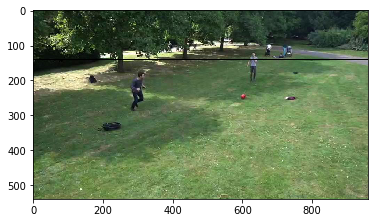

In [47]:
visualise_image(a)


In [60]:
f.close()

NameError: name 'f' is not defined

In [59]:
f2.close()

In [61]:
f2 = h5py.File(data_file, "r")

In [62]:
f2['frame1']['image'].shape

(540, 960, 3)

In [63]:
a = np.copy(f2['frame1']['image'].value)

In [71]:
a[150:154,:,:]=0

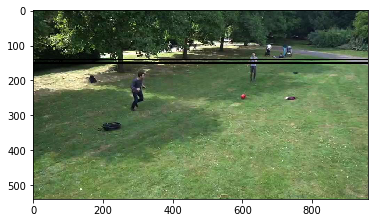

In [72]:
visualise_image(a)

In [66]:
f2.close()